**Information:** *Brief introduction to convexity, optimization, and gradient descent*

**Written by:** *Zihao Xu*

**Last update date:** *06.09.2021*

# Convexity
## Introduction
- Convexity plays a vital rule in the design of optimization algorithms, which is largely due to fact that it is much easier to analyze and test algorithms in such a context. 
- If the algorithm performs poorly even in the convex setting, typically we should not hope to see great results otherwise.
- Even though the optimization problems in ML/DL are generally non-convex, they often exhibit some properties of convex ones near local minimum.

## Open and Closed Sets
- Define $$A\subset\mathbb{R}^n$$ and open ball of diameter $\epsilon$ is $B(r,\epsilon)=\{r\in\mathbb{R}^n:\|r-r_o\|<\epsilon\}$
- A set $A$ is **open** if
    - At every point, there is an open ball contained in $A$
    - $\forall r\in A,\ \exists\epsilon>0$ s.t. $B(r,\epsilon)\subset A$
- A set $A$ is **closed** if $A^c=\mathbb{R}^n-A$ is open
- A set $A$ is compact if it is closed and bounded
- Facts:
    - $\mathbb{R}^N$ is both open and closed, but it is not compact
    - If $A$ is compact, then every sequence in $A$ has a limit point in $A$

## Convex Sets
### Definition
- A set $C$ is convex if, for any $x,y\in C$ and $\theta\in\mathbb{R}$ with $0\le\theta\le 1$: $$\theta x+(1-\theta)y\in C$$
    - Intuitively, it means if we take any two elements in $C$ and draw a line segment between these two elements, then every point on that line segment also belongs to $C$
- The point $\theta x+(1-\theta)y$ is called a **convex combination** of the points $x$ and $y$

### Examples
- **All of** $\mathbb{R}^n$. 
    - Given any $\mathbf{x},\mathbf{y}\in\mathbb{R}^n$,$$\theta \mathbf{x}+(1-\theta)\mathbf{y}\in\mathbb{R}^n$$
- **The non-negative orthant** $\mathbb{R}^n_+$.
    - $\mathbb{R}^n_+$ consists of all vectors in $\mathbb{R}^n$ whose elements are all non-negative $$\mathbb{R}^n_+=\{\mathbf{x}:x_i\ge 0\ \forall i =1,\cdots,n\}$$
    - Given any $\mathbf{x},\mathbf{y}\in\mathbb{R}^N_+$ and $0\le\theta\le 1$, $$(\theta \mathbf{x}+(1-\theta)\mathbf{y})_i=\theta x_i+(1-\theta)y_i\ge 0\ \forall i$$
- **Norm balls**
    - Let $\|\cdot\|$ be some norm on $\mathbb{R}^n$ (e.g., the Euclidean norm $\|\mathbf{x}\|_2=\sqrt{\Sigma^n_{i=1}x_i^2}$). Then the set $\{\mathbf{x}:\|\mathbf{x}\|\le 1\}$ is a convex set.
    - Given $\mathbf{x},\mathbf{y}\in\mathbb{R}^n$ with $\|\mathbf{x}\|\le 1,\|\mathbf{y}\|\le 1$ and $0\le\theta\le 1$. Then $$\|\theta \mathbf{x}+(1-\theta)\mathbf{y}\|\le\|\theta \mathbf{x}\|+\|(1-\theta)\mathbf{y}\|=\theta\|\mathbf{x}\|+(1-\theta)\|\mathbf{y}\|\le 1$$ where the **triangle inequality** and the **positive homogeneity** of norms are used
- **Affine subspaces and polyhedra**
    - Given a matrix $\mathbf{A}\in\mathbb{R}^{m\times n}$ and a vector $\mathbf{b}\in\mathbb{R}^m$, an affine subspace is the set $\{\mathbf{x}\in\mathbb{R}^n:\mathbf{A}\mathbf{x}=\mathbf{b}\}$ (note this could possible be empty if $\mathbf{b}$ is not in range of $\mathbf{A}$).
    - Given $\mathbf{x},\mathbf{y}\in\mathbb{R}^n$ s.t. $\mathbf{Ax}=\mathbf{Ay}=\mathbf{b}$, then for $0\le\theta\le 1$: $$\mathbf{A}(\theta \mathbf{x}+(1-\theta)\mathbf{y})=\theta \mathbf{Ax}+(1-\theta)\mathbf{Ay}=\theta \mathbf{b}+(1-\theta)\mathbf{b}=\mathbf{b}$$
    - Similarly, a polyhedron is the set $\{\mathbf{x}\in\mathbb{R}^n:\mathbf{Ax}\preceq \mathbf{b}\}$ (also possibly empty), where $\preceq$ denotes componentwise inequality
        - All the entries of $\mathbf{Ax}$ are less than or equal to their corresponding element in $\mathbf{b}$
    - Given $\mathbf{x},\mathbf{y}\in\mathbb{R}^n$ that satisfy $\mathbf{Ax}\le \mathbf{b}$ and $\mathbf{Ay}\le \mathbf{b}$ and $0\le\theta\le 1$: $$\mathbf{A}(\theta \mathbf{x}+(1-\theta)\mathbf{y})\le\theta \mathbf{b}+(1-\theta)\mathbf{b}=\mathbf{b}$$
- **Intersection of convex sets**
    - Suppose $C_1,C_2,\cdots,C_k$ are convex sets. Then their intersection $$\underset{i=1}{\overset{k}{\bigcap}}C_i=\{x:x\in C_i\ \forall i=1,\cdots,k\}$$ is also a convex set
    - Given $x,y\in\underset{i=1}{\overset{k}{\bigcap}}C_i$ and $0\le\theta\le 1$. Then $$\theta x+(1-\theta)y\in C_i\ \forall i=1,\cdots,k$$ by the definition of a convex set. Therefore $$\theta x+(1-\theta)y\in\underset{i=1}{\overset{k}{\bigcap}}C_i$$
    - Note that the *union* of convex sets in general will not be convex
- **Positive semidefinite matrices**
    - The set of all symmetric positive semidefinite matrices, often times called the *positive semidefinite cone* and denoted $\mathbb{S}_+^n$ is a convex set (in general, $\mathbb{S}^n\subset\mathbb{R}^{n\times n}$ denotes the set of symmetric $n\times n$ matrices).
    - A matrix $\mathbf{A}\in\mathbb{R}^{n\times n}$ is symmetric positive semidefinite if and only if $\mathbf{A}=\mathbf{A}^T$ and for all $\mathbf{x}\in\mathbb{R}^n,\mathbf{x}^T\mathbf{Ax}\le 0$
    - Given two symmetric positive semidefinite matrices $\mathbf{A},\mathbf{B}\in\mathbb{S}^n_+$ and $0\le\theta\le 1$, then for any $\mathbf{x}\in\mathbb{R}^n$, $$\mathbf{x}^T(\theta\mathbf{A}+(1-\theta)\mathbf{B})\mathbf{x}=\theta \mathbf{x}^T\mathbf{Ax}+(1-\theta)\mathbf{x}^T\mathbf{B}\mathbf{x}\ge 0$$
    - The logic to show that all **positive definite**, **negative definite**, and **negative semidefinite** matrices are each also convex

## Convex Functions
### Definition
- A function $f:\mathbb{R}^n\rightarrow\mathbb{R}$ is convex if its domain (denoted $\mathcal{D}(f)$) is a *convex set*, and if, for all $\mathbf{x},\mathbf{y}\in\mathcal{D}(f)$ and $\theta\in\mathbb{R},0\le\theta\le 1$: $$f(\theta\mathbf{x}+(1-\theta)\mathbf{y})\le\theta f(\mathbf{x})+(1-\theta)f(\mathbf{y})$$
    - Intuitively, it means if we pick any two points on the graph pf a convex function and draw a straight line between them, then the portion of function between these two points will lie below this straight line.
- A function is called **strictly convex** if the definition holds with strict inequality for $\mathbf{x}\ne\mathbf{y}$ and $0\lt\theta\lt 1$ 
- A function $f$ is called **concave** if $-f$ is convex
- A function $f$ is called **strictly concave** if $-f$ is strictly convex

### First Order Condition for Convexity
- Suppose a function $f:\mathbb{R}^n\rightarrow\mathbb{R}$ is differentiable. Then $f$ is convex if and only if $\mathcal{D}(f)$ is a convex set and for $\mathbf{x},\mathbf{y}\in\mathcal{D}(f)$, $$f(\mathbf{y})\ge f(\mathbf{x})+\nabla_x f(\mathbf{x})^T(\mathbf{y}-\mathbf{x})$$ where the function $f(\mathbf{x})+\nabla_x f(\mathbf{x})^T(\mathbf{y}-\mathbf{x})$ is called the **first-order approximation** to the function $f$ at the point $\mathbf{x}$
    - Intuitively, this can be thought of as approximating $f$ with its tangent line at the point $\mathbf{x}$.
- Similarly, $f$ would be 
    - strictly convex if this holds with strict inequality
    - concave if the inequality is reversed
    - strictly concave if the reverse inequality is strict

### Second Order Condition for Convexity
- Suppose a function $f:\mathbb{R}^n\rightarrow\mathbb{R}$ is twice differentiable. Then $f$ is convex if and only if $\mathcal{D}(f)$ is a convex set and its *Hessian* is positive semidefinite: $$\forall x\in\mathcal{D}(f),\ \nabla^2_xf(x)\succeq 0$$
    - Here the notation $\succeq$ refers to positive semidefiniteness
    - In one dimension, this is equivalent to the condition that the second derivative $f''(x)$ always be positive
- Similarly, $f$ is
    - strictly convex if its Hessian is positive definite
    - concave if the Hessian is negative semidefinite
    - strictly concave if the Hessian is negative definite

### Jensen's Inequality
Start with the inequality in the basic definition of a convex function $$f(\theta x+(1-\theta)y)\le\theta f(x)+(1-\theta)f(y)\ \text{for}\ 0\le\theta\le 1$$ Using induction, extend this definition to convex combinations of more than one point $$f\left(\underset{i=1}{\overset{k}{\Sigma}}\theta_ix_i\right)\le\underset{i=1}{\overset{k}{\Sigma}}\theta_if(x_i)\ \ \text{for}\ \underset{i=1}{\overset{k}{\Sigma}}\theta_i=1,\ \theta_i\ge 0\ \forall i$$ This can also extend to infinite sums or integrals. In the latter case, the inequality can be written as $$f\left(\int p(x)xdx\right)\le\int p(x)f(x)dx \ \ \ \text{for}\ \ \ \int p(x)dx=1,\ p(x)\ge 0\ \ \forall x$$ Since $\int p(x)dx=1$, it is common to consider it a probability density, in which case the previous equation can be written in terms of expectations $$f(\mathbb{E}[x])\le\mathbb{E}[f(x)]$$ which is called **Jensen's inequality**

### Examples
- **Exponential**
    - Let $f:\mathbb{R}\rightarrow\mathbb{R},f(x)=e^{ax}$ for any $a\in\mathbb{R}$.
    - $f''(x)=a^2e^{ax}$ is positive for all $x$
- **Negative logarithm**
    - Let $f:\mathbb{R}\rightarrow\mathbb{R},f(x)=-\text{log}x$ with domain $\mathcal{D}(f)=\mathbb{R}_{++}=\{x:x>0\}$
    - $f''(x)=\frac{1}{x^2}\gt 0$ for all $x$
- **Affine functions**
    - Let $f:\mathbb{R}^n\rightarrow\mathbb{R},f(\mathbf{x})=\mathbf{b}^T\mathbf{x}+c$ for some $\mathbf{b}\in\mathbb{R}^n,c\in\mathbb{R}$
    - The Hessian $\nabla^2_{\mathbf{x}}f(\mathbf{x})=0$ for all $\mathbf{x}$
    - Affine functions of this form are the **only** functions that are **both convex and concave**
- **Quadratic function**
    - Let $f:\mathbb{R}^n\rightarrow\mathbb{R},f(\mathbf{x})=\frac{1}{2}\mathbf{x}^T\mathbf{Ax}+\mathbf{b}^T\mathbf{x}+c$ for a symmetric matrix $\mathbf{A}\in\mathbb{S}^n,b\in\mathbb{R}^n$ and $c\in\mathbb{R}$
    - The Hessian for this function is $\nabla^2_{\mathbf{x}}f(\mathbf{x})=\mathbf{A}$
    - The convexity or non-convexity of $f$ is determined entirely by whether or not $\mathbf{A}$ is positive semidefinite
    - The **squared Euclidean norm** $f(\mathbf{x})=\|\mathbf{x}\|^2_2=\mathbf{x}^T\mathbf{x}$ is a special case of quadratic functions where $\mathbf{A}=\mathbf{I},\mathbf{b}=\mathbf{0},c=0$, so it is therefore a **strictly convex function**
- **Norms**
    - Let $f:\mathbb{R}^n\rightarrow\mathbb{R}$ be some norm on $\mathbb{R}^n$. 
    - By the **triangle inequality** and **positive homogeneity** of norms, for $\mathbf{x},\mathbf{y}\in\mathbb{R}^n,0\le\theta\le 1$, $$f(\theta \mathbf{x}+(1-\theta)\mathbf{y})\le f(\theta \mathbf{x})+f((1-\theta)\mathbf{y})=\theta f(\mathbf{x})+(1-\theta)f(\mathbf{y})$$
    - Not possible to prove convexity based on the first or second order conditions because norms are not generally differentiable
- **Nonnegative weighted sums of convex functions**
    - Let $f_1,f_2,\cdots,f_k$ be convex functions and $w_1,w_2,\cdots,w_k$ be nonnegative real numbers. Then $$f(x)=\underset{i=1}{\overset{k}{\Sigma}}w_if_i(x)$$ is a convex function, since $$\begin{aligned}f(\theta x+(1-\theta)y)&=\underset{i=1}{\overset{k}{\Sigma}}w_if_i(\theta x+(1-\theta)y)\\&\le\underset{i=1}{\overset{k}{\Sigma}}w_i(\theta f_i(x)+(1-\theta)f_i(y))\\&=\theta\underset{i=1}{\overset{k}{\Sigma}}w_if_i(x)+(1-\theta)\underset{i=1}{\overset{k}{\Sigma}}w_if_i(y)\\&=\theta f(x)+(1-\theta)f(x)\end{aligned}$$

%%latex
\newpage

# Optimization
## Definition
- Optimization refers to the task of either **minimizing** or maximizing some function $f(\mathbf{x})$ by altering $\mathbf{x}$
    - Usually phrase most optimization problems in terms of minimizing $f(\mathbf{x})$
    - Maximization may be accomplished via a minimization algorithm by minimizing $-f(\mathbf{x})$
    

- Usually the function we want to minimize is called the **objective function**, or **criterion**.


- Usually denote the value that minimizes a function with a superscript $*$: $$\mathbf{x}^*=\text{arg}\underset{\mathbf{x}}{\text{min}}f(\mathbf{x})$$

## Local Minimum and Global Minimum
### Local Minimum
- Let $f:A\rightarrow\mathbb{R}$ where $A\subset \mathbb{R}^N$, a point $x$ is locally minimal if it is available and if there exists some $R\lt 0$ such that all feasible points $z$ with $\|x-z\|_2\le R$, satisfy $f(x)\le f(z)$
- **Necessary** condition for local minimum
    - Let $f$ be continuously differentiable and let $x\in A$ be a local minimum, then $\nabla f(x)=0$
- **Saddle Point**:
    - We say that $x\in A$ is a saddle point of $f$ if $\nabla f(x)=0$ and $r_o$ is not a local minimum

### Global Minimum
- A point $x$ is globally minimal if it is available and for all feasible points $z$, $f(x)\le f(z)$
    - A global minimum must also be a local minimum

## Optimization Theorems
- Let $f:A\rightarrow\mathbb{R}$ where $A\subset\mathbb{R}^N$
    - If $f$ is continuous and $A$ is **compact**, then $f$ takes on a global minimum in $A$
    - If $f$ is **convex** on $A$, then any local minimum is a global minimum
    - If $f$ is continuously differentiable and convex on $A$, then $\nabla f(x)=0$ implies the $x\in A$ is a global minimum of $f$
- **Important Facts**:
    - Global minimum **may not be unique**
    - If $A$ is closed but not bounded, then $f$ may not take on a global minimum
    - Most interesting functions in ML/DL are **not** convex 

## Convex Optimization
- Formally, a convex optimization problem is an optimization problem of the form $$\begin{aligned}&\text{minimize}&f(x)\\&\text{subject to}&x\in C\end{aligned}$$ where $f$ is a convex function, $C$ is a convex set, and $x$ is the optimization variable
- Often written as $$\begin{aligned}&\text{minimize}&f(x)&\ \\&\text{subject to}&g_i(x)\le 0 &\ \ \ i=1,\cdots,m\\& &h_i(x)=0 &\ \ \ i=1,\cdots,p \end{aligned}$$ where $f$ is a convex function, $g_i$ are convex functions and $h_i$ are affine functions and $x$ is the optimization variable

## Constrained Optimization
### Definition
- Sometimes we wish not only to maximize or minimize a function $f(\mathbf{x})$ over all possible values of $\mathbf{x}$. Instead the maximal or minimal value of $f(\mathbf{x})$ for values of $\mathbf{x}$ in some set $\mathbb{S}$. This is known as **constrained optimization**
- Points $\mathbf{x}$ that lies within the set $\mathbb{S}$ are called **feasible** points in constrained optimization terminology 

### Karush-Kuhn-Tucker (KKT) approach
- **Intuition**: Design a different, **unconstrained** optimization problem whose solution can be converted into a solution to the original constrained optimization problem
    - For example, to minimize $f(\mathbf{x})$ for $\mathbf{x}\in\mathbb{R}^2$ with $\mathbf{x}$ constrained to have exactly unit $L^2$ norm, we can instead minimize $$g(\theta)=f([\text{cos}\theta,\text{sin}\theta]^T)$$ with respect to $\theta$, then return $[\text{cos}\theta,\text{sin}\theta]$ as the solution to the original problem
    - Requires creativity
    - The transformation between optimization problems must be designed specifically for each case we counter
- **Karush-Kuhn-Tucker** (KKT) approach provides a very general solution to constrained optimization
- **Generalized Lagrangian**
    - Also called **generalized Lagrange function**
    - Describe $\mathbb{S}$ in terms of $m$ functions $g_i$ and $n$ functions $h_j$: $$\mathbb{S}=\{\mathbf{x}|\forall i,g_i(\mathbf{x})=0\text{ and }\forall j,h_j(\mathbf{x})\le 0\}$$ Equations involving $g_i$ are called the **equality constraints** and the inequalities involving $h_j$ are called **inequality constraints**
    - Introduce new variables $\lambda_i$ and $\alpha_i$ for each constraint, which are called the **KKT multipliers**, then the generalized Lagrangian is then defined as $$L(\mathbf{x},\boldsymbol{\lambda},\boldsymbol{\alpha})=f(\mathbf{x})+\underset{i=1}{\overset{m}{\Sigma}}\lambda_ig_i(\mathbf{x})+\underset{j}{\overset{n}{\Sigma}}\alpha_jh_j(\mathbf{x})$$ 
    - The generalized Lagrangian enables us to solve a constrained minimization problem using unconstrained optimization of the generalized Lagrangian. As long as at least one feasible point exists and $f(\mathbf{x})$ is not permitted to have value $\infty$, then $$\underset{\mathbf{x}}{\text{min}}\ \underset{\boldsymbol{\lambda}}{\text{max}}\ \underset{\boldsymbol{\alpha},\boldsymbol{\alpha}\ge 0}{\text{max}}L(\mathbf{x},\boldsymbol{\lambda},\boldsymbol{\alpha})$$ has the same optimal objective function value ans set of optimal points $\mathbf{x}$ as $$\underset{\mathbf{x}\in\mathbb{S}}{\text{min}}f(x)$$
    - Any time the constraints are satisfied $$\underset{\boldsymbol{\lambda}}{\text{max}}\ \underset{\boldsymbol{\alpha},\boldsymbol{\alpha}\ge 0}{\text{max}}L(\mathbf{x},\boldsymbol{\lambda},\boldsymbol{\alpha})=f(\mathbf{x})$$ while any time a constraint is violated $$\underset{\boldsymbol{\lambda}}{\text{max}}\ \underset{\boldsymbol{\alpha},\boldsymbol{\alpha}\ge 0}{\text{max}}L(\mathbf{x},\boldsymbol{\lambda},\boldsymbol{\alpha})=\infty$$ These properties guarantee that no infeasible point can be optimal, and that the optimum within the feasible points is unchanged
- **KKT Conditions**:
    - A simple set of properties describe the optimal properties of constrained optimization problems
    - **Necessary** conditions but **not always sufficient** conditions
    - The conditions are:
        - The gradient of the generalized Lagrangian is zero
        - All constraints on both $\mathbf{x}$ and the KKT multipliers are satisfied
        - The inequality constraints exhibit "complementary slackness": $\boldsymbol{\alpha}\odot\mathbf{h}(\mathbf{x})=\mathbf{0}$

### Example: Linear Least Squares
To find the value of $\mathbf{x}$ that minimizes $$f(\mathbf{x})=\frac{1}{2}\|\mathbf{Ax}-\mathbf{b}\|^2_2$$ subject to the constraint $\mathbf{x}^T\mathbf{x}\le 1$, introduce the **Lagrangian** 
$$L(\mathbf{x},\lambda)=f(\mathbf{x})+\lambda(\mathbf{x}^T\mathbf{x}-1)$$ 
then solve the problem 
$$\underset{\mathbf{x}}{\text{min}}\ \underset{\lambda,\lambda\ge 0}{\text{max}}L(\mathbf{x},\lambda)$$ 
By differentiating the Lagrangian with respect to $\mathbf{x}$, obtain 
$$\mathbf{A}^T\mathbf{Ax}-\mathbf{A}^T\mathbf{b}+2\lambda\mathbf{x}=0$$ 
which means the solution would take the form 
$$\mathbf{x}=(\mathbf{A}^T\mathbf{A}+2\lambda\mathbf{I})^{-1}\mathbf{A}^T\mathbf{b}$$
To decide the magnitude of $\lambda$ which makes the result obeys the constraint, perform gradient ascent on $\lambda$: 
$$\frac{\partial}{\partial \lambda}L(\mathbf{x},\lambda)=\mathbf{x}^T\mathbf{x}-1$$
When the norm of $\mathbf{x}$ exceeds $1$, the derivative is positive and we need to increase $\lambda$. Because the coefficient on the $\mathbf{x}^T\mathbf{x}$ penalty has increased, solving the linear equation for $\mathbf{x}$ will now yield a solution with smaller norm. Repeat the process of solving the linear equation and adjusting $\lambda$ continues until $\mathbf{x}$ has the correct norm and the derivative on $\lambda$ is 0

## Optimization in Machine Learning
- In most machine learning scenarios, we cares about some performance measure $P$ and then reduce a **cost function** $L(\boldsymbol{\theta})$ in the hope that doing so will improve $P$


- Typically, the cost function can be written as an average over the training set $$L(\boldsymbol{\theta})=L\left(f\left(\mathbf{x},\boldsymbol{\theta}\right),y\right)=\underset{i=1}{\overset{n}{\Sigma}}l_i(\boldsymbol{\theta})=\underset{i=1}{\overset{n}{\Sigma}}l\left(f\left(\mathbf{x}_i,\boldsymbol{\theta}\right),y_i\right)$$ where $n$ is the number of examples in the training set, $l$ is the per-example **loss function**, $f(\mathbf{x},\boldsymbol{\theta})$ is the predicted output when the input is $\mathbf{x}$ and $y$ is the corresponding label in supervised learning cases
    - In *MIT Deep Learning Book*, the cost function is denoted as $J(\boldsymbol{\theta})$ and the loss function is denoted by $L(\boldsymbol{\theta})$. Here different notations are used according to my personal preference.
    - Notice that the cost function is **not** equal to the loss function!


- Intuitively speaking, a loss function quantifies the *distance* between the **real** and **predicted** value of the target.
    - Usually be a non-negative number where smaller values are better and perfect predictions incur a loss of $0$


- Although learning typically involves a optimization problem, it's slightly different from a purely optimization problem, which will be showed in the chapter talking about *generalization and regularization*. Here we only focus on the numerical optimization part
    - Purely optimization on training set does not mean good performance on test sets
    - Based on the fact that the cost function in machine learning problems can be decomposed to sum of loss functions of single examples, we can make use of the cost function in many different ways


- Most ML/DL algorithms are so complex that it is difficult or impossible to find the closed form solution for the optimization problem
    - Use numerical optimization method instead


- One common algorithm is **gradient descent**, other optimization algorithms are
    - Expectation Maximization
    - Sampling-based optimization
    - Greedy optimization

%%latex
\newpage

# Gradient Descent
## Definition
- **Definition**:
    - A **first-order iterative** optimization algorithm for finding **local minimum** of a **differential** function.
        - The idea is to take *repeated steps* in the opposite direction of the *gradient* of the function at the current point, because this is the direction of steepest descent.
        - As it only calculates the *first-order* derivative, it requires the objective function to be *differential* and is called *first-order optimization algorithms*
            - Some optimization algorithms that also use the Hessian matrix are called *second-order optimization algorithms*
        - Converge when first-order derivative is zero, which only ensures reaching **local minimum** for general functions
            - That is to say, the start point will sometimes affect final convergence
        - Generally speaking, gradient descent algorithms converge to the **global minimum** of continuously differentiable **convex** functions
- **Theory**:
    - Based on the observation that if the multi-variable function $F(\mathbf{x})$ is defined and differentiable in a neighborhood of a point $\mathbf{a}$, then $F(\mathbf{x})$ decreases **fastest** if one goes from $\mathbf{a}$ in the direction of the negative gradient of $F$ at $\mathbf{a}$, which is $-\nabla F(\mathbf{a})$. It follows that if $$\mathbf{a}_{n+1}=\mathbf{a}_n-\eta\nabla F(\mathbf{a}_n)$$ for a $\eta\in\mathbb{R}_+$ small enough, then $$F(\mathbf{a}_n)\ge F(\mathbf{a}_{n+1})$$
- Simple form of **vanilla gradient descent** (GD):
    1. Start at random parameter $\boldsymbol{\theta}$
    2. Repeat until converged
        - $\mathbf{d}\leftarrow-\nabla L(\boldsymbol{\theta})$
        - $\boldsymbol{\theta}\leftarrow\boldsymbol{\theta}+\eta\mathbf{d}^T$
    - $\eta$ is called **learning rate** or **step size**

## Compute Loss Gradient
- Take the **mean square error** as an example: $$\begin{aligned}\nabla_{\boldsymbol{\theta}}L_{MSE}(\boldsymbol{\theta})&=\nabla_{\boldsymbol{\theta}}\left\{\frac{1}{n}\underset{k=1}{\overset{n}{\Sigma}}\left\|\mathbf{y}^{(k)}-f(\mathbf{x}^{(k)},\boldsymbol{\theta})\right\|^2\right\}\\&=\frac{1}{n}\underset{k=1}{\overset{n}{\Sigma}}\nabla_{\boldsymbol{\theta}}\left\{\left(\mathbf{y}^{(k)}-f(\mathbf{x}^{(k)},\boldsymbol{\theta})\right)^T\left(\mathbf{y}^{(k)}-f(\mathbf{x}^{(k)},\boldsymbol{\theta})\right)\right\}\end{aligned}$$ Use the chain rule and scale-by-vector matrix calculus identity that $$\frac{\partial \mathbf{x}^T\mathbf{x}}{\partial \mathbf{x}}=2\mathbf{x}^T$$ We can get $$\begin{aligned}\nabla_{\boldsymbol{\theta}}L_{MSE}(\boldsymbol{\theta})&=\frac{2}{n}\underset{k=1}{\overset{n}{\Sigma}}\left(\mathbf{y}^{(k)}-f(\mathbf{x}^{(k)},\boldsymbol{\theta})\right)^T\nabla_{\boldsymbol{\theta}}\left(\mathbf{y}^{(k)}-f(\mathbf{x}^{(k)},\boldsymbol{\theta})\right)\\&=\frac{2}{n}\underset{k=1}{\overset{n}{\Sigma}}\left(\mathbf{y}^{(k)}-f(\mathbf{x}^{(k)},\boldsymbol{\theta})\right)^T\nabla_{\boldsymbol{\theta}}(-f(\mathbf{x}^{(k)},\boldsymbol{\theta}))\\&=-\frac{2}{n}\underset{k=1}{\overset{n}{\Sigma}}\left(\mathbf{y}^{(k)}-f(\mathbf{x}^{(k)},\boldsymbol{\theta})\right)^T\nabla_{\boldsymbol{\theta}}(f(\mathbf{x}^{(k)},\boldsymbol{\theta}))\end{aligned}$$
- The result of the gradient usually includes three parts:
    - Sum over training data. It consists of a lot of computations but the way of computation is relatively easy and straight forward
    - Prediction error term such as $\mathbf{y}^{(k)}-f(\mathbf{x}^{(k)},\boldsymbol{\theta})$ in MSE, which is usually easy to get
    - Gradient of inference function $\nabla_{\boldsymbol{\theta}}(f(\mathbf{x}^{(k)},\boldsymbol{\theta}))$, which is difficult to solve
        - Enabled by **automatic differentiation** built into modern domain specific languages such as Pytorch, Tensorflow, ...
        - For neural networks, this is known as **back propagation**

## Select appropriate learning rate
- Too large $\eta$ leads to instability and even divergence
- Too small $\eta$ leads to slow convergence
- **Steepest gradient descent** use **line search** to compute the best $\eta$
    1. Start at random parameter $\boldsymbol{\theta}$
    2. Repeat until converged
        - $\mathbf{d}\leftarrow-\nabla L(\boldsymbol{\theta})$
        - $\eta^*\leftarrow\text{arg}\underset{\eta}{\text{min}}\{L(\boldsymbol{\theta}+\eta\mathbf{d}^T)\}$
        - $\boldsymbol{\theta}\leftarrow\boldsymbol{\theta}+\eta^*\mathbf{d}^T$
- **Adaptive learning rates** may help, but not always
    - $\alpha=\frac{1}{t}$, approaches 0 but can cover an infinite distance since $\underset{a\rightarrow\infty}{\text{lim}}\underset{t=1}{\overset{a}{\Sigma}}\frac{1}{t}=\infty$
- **Coordinate Descent** update one parameter at a time
    - Removes problem of selecting step size
    - Each update can be very fast, but lots of updates

## Slow convergence due to Poor Conditioning
- **Conditioning** refers to how rapidly a function changes with respect to small changes in its inputs.
- Consider the function $$f(x)=\mathbf{A}^{-1}\mathbf{x}$$ When $\mathbf{A}\in\mathbb{R}^{n\times n}$ has an eigenvalue decomposition, its **condition number** is $$\underset{i,j}{\text{max}}\left|\frac{\lambda_i}{\lambda_j}\right|$$ This is the ratio of the magnitude of the largest and smallest eigenvalue
- A problem with a **low condition number** is said to be **well-conditioned**, while a problem with a high condition number is said to be **ill-conditioned**
    - In non-mathematical terms, an ill-conditioned problem is one where, for a small change in the inputs there is a large change in the answer or dependent variable, which means the correct solution to the equation becomes hard to find
    - Condition number is a property of the problem
- **Gradient descent** is very sensitive to **condition number** of the problem
    - No good choice of step size. Tiny change in one variable could lead to great change in dependent variable.
- **Solutions:**
    - **Coordinate Descent**: Update one parameter at a time
        - Removes problems of selecting step size
        - Each update can be very fast, but need a lot of updates
    - **Newton's method**: Correct for local second derivative.
        - Too much computation and too difficult to implement
        - Harmful when near saddle points
    - **Alternative methods**:
        - Preconditioning: Easy, but tends to be ad-hoc, not so robust
        - Momentum

## Vanishing Gradients
- The most insidious problem to encounter
- Some function leads to almost zero gradients far away from local minimums, which makes the optimization stuck for a long time or even stop.
- For example, assume that we want to minimize the function $$f(x)=\text{tanh}(x)$$ The derivative is $$f'(x)=1-\text{tanh}^2(x)$$ If we happen to get started at $x=4$ then the derivative at that point is $$f'(4)=0.0013$$ The gradient is close to nil. Consequently, optimization will get stuck for a long time before we make progress
- **Possible Solutions**:
    - Reparameterize the problem
    - Good initialization of the parameter
    - Reconstruct the objective function (e.g., change activation function in neural networks)

%%latex
\newpage

# Stochastic Gradient Descent

## Motivation
In **Machine Learning and Deep Learning**, the objective function is usually the average of the loss functions for each example in the training dataset. Given a training dataset of $n$ examples, we assume that $l_k(\boldsymbol{\theta})=l\left(f(\mathbf{x}^{(k)}_{t},\boldsymbol{\theta}_{t-1}),y^{(k)}\right)$ is the loss function with respect to the training example of index $k$, where $\boldsymbol{\theta}$ is the parameter vector. The cost function is
$$L(\boldsymbol{\theta})=\frac{1}{n}\underset{k=1}{\overset{n}{\Sigma}}l_k(\boldsymbol{\theta})$$
Then the gradient of the cost function at $\boldsymbol{\theta}$ is computed as
$$\nabla L(\boldsymbol{\theta})=\frac{1}{n}\underset{k=1}{\overset{n}{\Sigma}}\nabla l_k(\boldsymbol{\theta})$$
It's obvious that when the training dataset is larger and larger, the computation cost for one iteration would become higher and higher, which leads to slow convergence

## Stochastic Gradient Updates
At each iteration, uniformly sample an index $k\in\{1,2,\cdots,n\}$ for data examples at random, and compute the gradient $\nabla l_k(\boldsymbol{\theta})$ to update $\mathbf{x}$: $$\mathbf{x}\leftarrow\mathbf{x}-\eta\nabla l_k(\boldsymbol{\theta})$$ where $\eta$ is the learning rate

### Advantages
- Reduce the computation cost for each iteration from $\mathcal{O}(n)$ to $\mathcal{O}(1)$
- $\nabla l_k(\boldsymbol{\theta})$ is an unbiased estimate of the full gradient $\nabla L(\boldsymbol{\theta})$: $$\mathbb{E}_i[\nabla l_k(\boldsymbol{\theta})]=\frac{1}{n}\underset{i=1}{\overset{n}{\Sigma}}\nabla l_k(\boldsymbol{\theta})=\nabla L(\boldsymbol{\theta})$$ which means the stochastic gradient is a good estimate of the gradient on average

### Disadvantages
- Usually the trajectory of the variables in SGD would be much more noisy than the one observed in gradient descent, due to the stochastic nature of the gradient
- Even when we arrive near the minimum, we are still subject to the uncertainty injected by the instantaneous gradient via $\eta\nabla l_k(\boldsymbol{\theta})$ and the performance usually won't improve
- No good choice of step size $\Rightarrow$ *Dynamic Learning Rate*
    - Large step size always make us hanging around the minimum
    - Small step size prevents any meaningful progress initially
    
### Remark
- Optimization algorithms that use the entire training set are called **batch** or **deterministic** gradient methods, because they process all the training examples simultaneously in a large batch
- Optimization algorithms that use only a single example at a time are sometimes called **stochastic** and sometimes **online** methods

## Dynamic Learning Rate
As mentioned above, we usually want a large step size at the beginning to accelerate the convergence and a small step size near minimum to get better performance. The intuition is to replace $\eta$ with a time-dependent learning rate $\eta(t)$, which requires to figure out how rapidly $\eta$ should decay. Decaying too quickly make us stop optimization prematurely and decaying to slowly will waste too much time on optimization. Several basic strategies that are used in adjusting $\eta$ over time is:

- *Piecewise constant*: $\eta(t)=\eta_i\ \text{if}\ t_i\le t\le t_{i+1}$. Common strategy for training deep networks
- *Exponential decay*: $\eta(t)=\eta_0\cdot e^{-\lambda t}$. Often leads to premature stopping before the algorithm has converged
- *Polynomial decay*: $\eta(t)=\eta_0\cdot(\beta t+1)^{-\alpha}$ A popular choice is $\alpha = 0.5$

## Stochastic Gradients and Finite Samples
- Usually, the we do not perform exactly **stochastic** gradient descent
- Instead of actually randomly select an instance from the training set with replacement, we iterated over all instances **exactly once**
- Consider sampling $n$ observations from the discrete distribution with *replacement*. The probability of choosing an element $i$ at random is $\frac{1}{n}$. Denote the probability of choose it $x$ times in $n$ samples is $P(X=x)$, then the probability of picking some sample **at least once** is $$P(X\ge 1)=1-\left(1-\frac{1}{n}\right)^n$$ When $n\rightarrow\infty$, it's easy to prove that $$\underset{n\rightarrow\infty}{\text{lim}}P(X\ge 1)=1-\frac{1}{e}\approx 0.63$$ Also consider the probability of picking some sample **exactly once** is $$P(X=1)=C^1_n\cdot\frac{1}{n}\left(1-\frac{1}{n}\right)^{n-1}$$ Similarly, $$\underset{n\rightarrow\infty}{\text{lim}}P(X= 1)=\frac{1}{e}\approx 0.37$$ That is to say, the sampling with replacement leads to an increased variance and decreased data efficiency relative to sampling without replacement. Therefore, in machine learning and deep learning context, we prefer **sampling without replacement**
- The common way is to iterating over the training dataset in different random orders

%%latex
\newpage

# Minibatch Stochastic Gradient Descent

## Motivation
- Gradient Descent is not particularly **data efficient** whenever data is very similar
- Stochastic Gradient Descent is not particularly **computationally efficient** since CPUs and GPUs cannot exploit the full power of **vectorization**
- There might be a happy medium between **GD** and **SGD**

## Vectorization
- Vectorization is a basic method to increase computational efficiency
    - Due to reduced overhead arising from the deep learning framework and due to better memory locality and caching on CPUs and GPUs
- Use vectorization to replace **loops**, which usually leads high computation cost
- It is highly advisable to use vectorization and matrices whenever possible
- Consider matrix-matrix multiplication $\mathbf{A}=\mathbf{BC}$. Common methods to compute $\mathbf{A}$ are:
    - $\mathbf{A}_{i,j}=\mathbf{B}_{i,:}\mathbf{C}^T_{:,j}$, compute it element-wise by means of dot product. In this way, we will need to copy one row and one column vector into the CPU each time we want to compute an element $\mathbf{A}_{i,j}$. In the meantime, we are required to access many disjoint locations for one of the two vectors as we read them from memory due to the fact that the matrix elements are aligned sequentially.
    - $\mathbf{A}_{:,j}=\mathbf{BC}^T_{:,j}$, compute one column at a time. We are able to keep the column vector $\mathbf{C}_{:,j}$ in the CPU cache while we keep on traversing through $\mathbf{B}$ 
    - $\mathbf{A}=\mathbf{BC}$ directly. Most desirable, but most matrices might not entirely fit into cache
    - Break $\mathbf{B}$ and $\mathbf{C}$ into smaller block matrices and compute $\mathbf{A}$ one block at a time. Offers a practically useful alternative: move blocks of the matrix into cache and multiply them locally
- Element-wise computation $\mathbf{A}_{i,j}=\mathbf{B}_{i,:}\mathbf{C}^T_{:,j}$

In [1]:
import numpy as np
import time
# Construct B,C
A = np.zeros((256, 256))
B = np.random.normal(0, 1, (256, 256))
C = np.random.normal(0, 1, (256, 256))
# Record the start time
start_time = time.time()
# Element-wise computation
for ii in range(256):
    for jj in range(256):
        A[:, jj] = np.dot(B[ii, :], C[:, jj])
# Record the end time
end_time = time.time()
# Show the time cost
print("Element-wise computation: %f ms" % (1000 * (end_time - start_time)))

Element-wise computation: 298.183203 ms


- Perform column-wise computation $\mathbf{A}_{:,j}=\mathbf{BC}^T_{:,j}$ is faster

In [2]:
# Record the start time
start_time = time.time()
# Column-wise computation
for jj in range(256):
    A[:, jj] = np.dot(B, C[:, jj])
# Record the end time
end_time = time.time()
# Show the time cost
print("Column-wise computation: %f ms" % (1000 * (end_time - start_time)))

Column-wise computation: 25.441408 ms


- The most effective manner is to perform the entire operation in one block $\mathbf{A}=\mathbf{BC}$

In [3]:
# Record the start time
start_time = time.time()
# Column-wise computation
A = np.dot(B, C)
# Record the end time
end_time = time.time()
# Show the time cost
print("Direct computation: %f ms" % (1000 * (end_time - start_time)))

Direct computation: 2.999067 ms


## Minibatches
- Processing single observations requires us to perform many single matrix-vector (or even vector-vector) multiplications, which is quite expensive and which incurs a significant overhead on behalf of the underlying deep learning framework. This applies whenever we perform $$\boldsymbol{\theta}_t\leftarrow\boldsymbol{\theta}_{t-1}-\eta_t\nabla_{\boldsymbol{\theta}}l\left(f(\mathbf{x}^{(k)}_{t},\boldsymbol{\theta}_{t-1}),y^{(k)}\right)$$
- Taking the **vectorization** method into consideration, we can increase the **computational efficiency** of this operation by applying it to a minibatch of observations at a time. That is to say, approximate the full gradient by the gradient of a batch of samples $$\boldsymbol{\theta}_t\leftarrow\boldsymbol{\theta}_{t-1}-\eta_t\underset{k=1}{\overset{b}{\Sigma}}\frac{1}{b}\nabla_{\boldsymbol{\theta}}l\left(f(\mathbf{x}^{(k)}_{t},\boldsymbol{\theta}_{t-1}),y^{(k)}\right)$$
- Since both $\mathbf{x}_t$ and also all elements of the minibatch are drawn uniformly at random from the training set, the **expectation** of the gradient remains unchanged
- The variance is reduced significantly (relative to SGD)
    - The standard deviation is reduced by a factor of $b^{-\frac{1}{2}}$, which means the updates are more reliably aligned with the full gradient
- Naively it indicates that choosing a large minibatch $b$ would be universally desirable while the additional reduction in standard deviation in minimal after some point when compared to the linear increase in computational cost
    - In practice, usually pick a minibatch that is large enough to offer good computational efficiency while still fitting into the memory of a GPU

## Minibatch SGD Summary
### Remark
- In general, minibatch stochastic gradient descent is faster than stochastic gradient descent and gradient descent for convergence to a smaller risk, when measures in terms of clock time
- Balance the trade-off between **statistical efficiency** arising from stochastic gradient descent and **computational efficiency** arising from processing large batches of data at a time
- Now it is quite common that the **minibatch stochastic** methods are simply called **stochastic** methods

### Batch size
- Large batches: less *noise* in gradient, provide a more accurate estimate of the gradient
    - Disadvantages: Slower updates per iteration; less exploration
    - Advantages: Better local convergence
- Smaller batches: more *noise* in gradient
    - Disadvantages: Hunts around local minimum
    - Advantages: Faster updates per iteration; better exploration
    
### Patch size
- Many algorithms train on image *patches*
- Smaller patches might fit better into GPU cache
- Whether smaller patches speed training is apocryphal

### Learning rate
- Too large learning rate leads to oscillations around local minimum
- Too small learning rate leads to convergence
- It is advisable to use **adaptive learning rate** and decay the learning rates during training

%%latex
\newpage

# Momentum
## Motivation
When performing optimization where only a noisy variant of the gradient is available, we need to be extra cautious when it comes to choosing the learning rate in the face of noise. If we decrease it too rapidly, convergence stalls. If we are too lenient, we fail to converge to a good enough solution since noise keeps on driving us away from optimality

## Leaky Averages
Consider the Minibatch SGD (Often called SGD directly), pay special attention to notations of time step: $$\boldsymbol{\theta}_t=\boldsymbol{\theta}_{t-1}-\eta_t\underset{k=1}{\overset{b}{\Sigma}}\frac{1}{b}\nabla_{\boldsymbol{\theta}}l\left(f(\mathbf{x}^{(k)}_{t},\boldsymbol{\theta}_{t-1}),y^{(k)}\right)$$ Denote the stochastic gradient descent as: $$\mathbf{g}_{t,t-1}=\underset{k=1}{\overset{b}{\Sigma}}\frac{1}{b}\nabla_{\boldsymbol{\theta}}l\left(f(\mathbf{x}^{(k)}_{t},\boldsymbol{\theta}_{t-1}),y^{(k)}\right)$$

One option to *benefit from the effect of variance reduction* even beyond averaging gradients on a minibatch is to *replace the gradient computation by a leaky average* $$\begin{aligned}\mathbf{v}_t&=\beta\mathbf{v}_{t-1}-\eta\mathbf{g}_{t,t-1}\\\boldsymbol{\theta}_{t}&=\boldsymbol{\theta}_{t-1}+\mathbf{v}_t\end{aligned}$$ for some $\beta\in(0,1)$. This effectively replace the instantaneous gradient by one that's been **averaged over multiple past gradients**. In some notations, it's in the equivalent form which might show the *average* process better $$\begin{aligned}\mathbf{v}_t&=\beta\mathbf{v}_{t-1}+\mathbf{g}_{t,t-1}\\\boldsymbol{\theta}_{t}&=\boldsymbol{\theta}_{t-1}-\eta\mathbf{v}_t\end{aligned}$$

- $\mathbf{v}$ is called **momentum**, whereas small $\beta$ amounts to only a slight correction relative to a gradient method
- The new gradient replacement no longer points into the direction of steepest descent on a particular instance any longer but rather than in the direction of a weighted average of past gradients
- Allows us to realize most of the benefits of *averaging over a batch without the cost of actually computing the gradients on it*
- Accelerates convergence significantly
- Desirable for both noise-free gradient descent and noisy stochastic gradient descent

Above reasoning formed the basis for what is known as **accelerated gradient methods**, such as gradients with momentum.

- Enjoy the additional benefit of being much more effective in cases where the optimization problem is **ill-conditioned** (where there are some directions where progress is much slower that in others, resembling a narrow canyon)
- Allow us to average over subsequent gradients to *obtain more stable directions of descents of descent*

## An ill-conditioned problem
As mentioned above, accelerated gradient methods enjoy the additional benefit of being much more effective in cases where the optimization problem is ill-conditioned. Here is an example to help understand what a ill-conditioned problem exactly is. Consider the problem $$f(\mathbf{x})=0.1x_1^2+2x_2^2$$
This function is very *flat* in the direction of $x_1$: $$\frac{\partial f}{\partial x_1}=0.2x_1,\ \frac{\partial f}{\partial x_2}=4x_2$$
It means that a tiny change in $x_2$ can lead to great changes in $f$ while changes in $x_1$ does not matter too much
Let's check how GD performs on this function with a learning rate of 0.4. The expected convergence point is $\mathbf{x}=\begin{bmatrix}0\\0\end{bmatrix}$

After 30 epoches, x1 is 0.445468, x2 is -0.000002


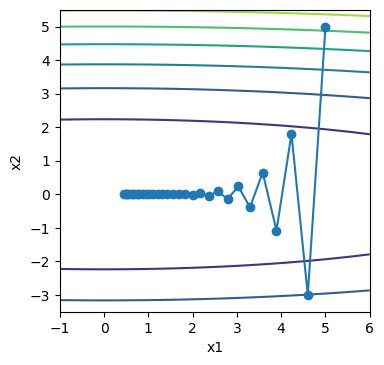

In [4]:
import matplotlib.pyplot as plt

eta = 0.4


def f(x_1, x_2):
    return 0.2 * x_1**2 + 2 * x_2**2


def gd(x_1, x_2):
    return (x_1 - eta * 0.2 * x_1, x_2 - eta * 4 * x_2)


# Number of iteration steps
iter = 30
# Record the iteration trace
x_arr = np.zeros((2, iter))
x_arr[:, 0] = np.array([5, 5])
f_arr = np.zeros((1, iter))
# Iteration
for ii in range(iter - 1):
    f_arr[0, ii] = f(x_arr[0, ii], x_arr[1, ii])
    (x_arr[0, ii + 1], x_arr[1, ii + 1]) = gd(x_arr[0, ii], x_arr[1, ii])
f_arr[0, iter - 1] = f(x_arr[0, iter - 1], x_arr[1, iter - 1])
print("After %d epoches, x1 is %f, x2 is %f" %
      (iter, x_arr[0, iter - 1], x_arr[1, iter - 1]))
# Visualization
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
# Plot the contour
vis_arr_x = np.linspace(-1, 6, 100)
vis_arr_y = np.linspace(-3.5, 5.5, 100)
vis_X, vis_Y = np.meshgrid(vis_arr_x, vis_arr_y)
vis_Z = 0.1 * vis_X**2 + 2 * vis_Y**2
ax.contour(vis_X, vis_Y, vis_Z)
ax.plot(x_arr[0, :], x_arr[1, :],'o-')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

The result indicates that when $x_2$ has converged to its true value, $x_1$ is far away its true value and its converging very slowly, due to the gradient in $x_2$ is *much* higher and change much more rapidly than in the horizontal $x_1$ direction. If we pick a small learning rate we ensure that the solution does not diverge in the $x_2$ direction but we are saddled with slow convergence in the $x_1$ direction. Conversely, with a large learning rate we progress rapidly in the $x_1$ direction but diverge in $x_2$. The result of trying with the learning rate of $0.6$ is shown below.

After 30 epoches, x1 is 0.122735, x2 is -86433.686984


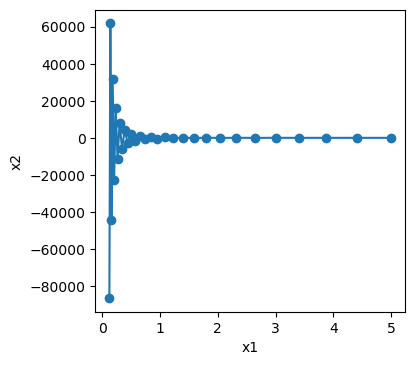

In [5]:
eta = 0.6


def f(x_1, x_2):
    return 0.2 * x_1**2 + 2 * x_2**2


def gd(x_1, x_2):
    return (x_1 - eta * 0.2 * x_1, x_2 - eta * 4 * x_2)


# Number of iteration steps
iter = 30
# Record the iteration trace
x_arr = np.zeros((2, iter))
x_arr[:, 0] = np.array([5, 5])
f_arr = np.zeros((1, iter))
# Iteration
for ii in range(iter - 1):
    f_arr[0, ii] = f(x_arr[0, ii], x_arr[1, ii])
    (x_arr[0, ii + 1], x_arr[1, ii + 1]) = gd(x_arr[0, ii], x_arr[1, ii])
f_arr[0, iter - 1] = f(x_arr[0, iter - 1], x_arr[1, iter - 1])
print("After %d epoches, x1 is %f, x2 is %f" %
      (iter, x_arr[0, iter - 1], x_arr[1, iter - 1]))
# Visualization
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
# Plot the contour
ax.plot(x_arr[0, :], x_arr[1, :],'o-')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

## Momentum Method Example
The momentum method allows us to solve the gradient descent problem described above.

- In the $x_1$ direction, it will aggregate well-aligned gradients, thus increasing the distance we cover with each step
- In the $x_2$ direction where gradients oscillate, an aggregate gradient will reduce step size due to oscillations that cancel with each other out. 

Using $\mathbf{v}_t$ instead of the gradient $\mathbf{g}_t$ yields the following update equations $$\begin{aligned}\mathbf{v}_t&\leftarrow\beta\mathbf{v}_{t-1}-\eta_t\mathbf{g}_{t,t-1}\\\mathbf{x}_t&\leftarrow\mathbf{x}_{t-1}+\mathbf{v}_t\end{aligned}$$ For $\beta=0$ we recover regular gradient descent.

The following is the performance of GD with gradient on the ill-conditioned problem mentioned above.

After 30 epoches, x1 is 0.000243, x2 is -0.000349


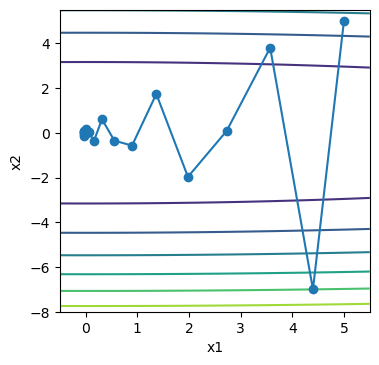

In [19]:
eta = 0.6
beta = 0.5


def momentum_gd(x1, x2, v1, v2):
    v1 = beta * v1 - eta * 0.2 * x1
    v2 = beta * v2 - eta * 4 * x2
    return x1 + v1, x2 + v2, v1, v2


# Number of iteration steps
iter = 30
# Record the iteration trace
x_arr = np.zeros((2, iter))
x_arr[:, 0] = np.array([5, 5])
f_arr = np.zeros((1, iter))
v1 = 0.
v2 = 0.
# Iteration
for ii in range(iter - 1):
    f_arr[0, ii] = 0.1 * x_arr[0, ii]**2 + 2 * x_arr[1, ii]**2
    x_arr[0,ii + 1], x_arr[1,ii + 1], v1, v2 =\
    momentum_gd(x_arr[0, ii],x_arr[1, ii], v1, v2)
f_arr[0, iter - 1] = 0.1 * x_arr[0, iter - 1]**2 + 2 * x_arr[1, iter - 1]**2
print("After %d epoches, x1 is %f, x2 is %f" %
      (iter, x_arr[0, iter - 1], x_arr[1, iter - 1]))
# Visualization
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
# Plot the contour
vis_arr_x = np.linspace(-0.5, 5.5, 100)
vis_arr_y = np.linspace(-8, 5.5, 100)
vis_X, vis_Y = np.meshgrid(vis_arr_x, vis_arr_y)
vis_Z = 0.1 * vis_X**2 + 2 * vis_Y**2
ax.contour(vis_X, vis_Y, vis_Z)
ax.plot(x_arr[0, :], x_arr[1, :],'o-')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

As we can see, gradient with momentum still converges well even with the same learning rate of $0.6$. The same method can also to applied to stochastic gradient descent and in particular, minibatch stochastic gradient descent.

## Effective Sample Weight
In momentum method $$\underset{\tau=0}{\overset{t-1}{\Sigma}}\beta^{\tau}\mathbf{g}_{t-\tau,t-\tau-1}$$ In the limit the terms add up to $$\underset{\tau=0}{\overset{\infty}{\Sigma}}\beta^{\tau}=\frac{1}{1-\beta}$$ That is to say, rather than taking a step size of $\eta$ in gradient descent or stochastic gradient descent we take a step of size $\frac{\eta}{1-\beta}$ while at the same time, dealing with a potentially much better behaved descent direction. The following are the behavior of different choices of $\beta$.

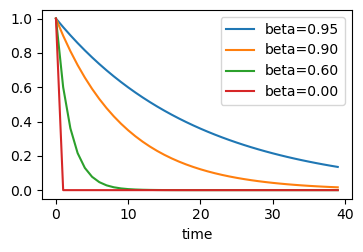

In [7]:
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=100)
betas = np.array([0.95, 0.9, 0.6, 0.])
for beta in betas:
    x = np.arange(40)
    ax.plot(x, beta**x, label='beta=%.2f' % beta)
ax.set_xlabel('time')
ax.legend()
plt.show()

## Nesterov Momentum
- While the updates rules in vanilla momentum method is $$\begin{aligned}\mathbf{v}_t&=\beta\mathbf{v}_{t-1}-\eta_t\frac{1}{b}\underset{k=1}{\overset{b}{\Sigma}}\nabla_{\boldsymbol{\theta}}l\left(f(\mathbf{x}^{(k)}_{t},\boldsymbol{\theta}_{t-1}),y^{(k)}\right)\\ \boldsymbol{\theta}_t&=\boldsymbol{\theta}_{t-1}+\mathbf{v}_{t}\end{aligned}$$ The updates rules in Nesrtov's accelerated gradient method are given by $$\begin{aligned}\mathbf{v}_t&=\beta\mathbf{v}_{t-1}-\eta_t\frac{1}{b}\underset{k=1}{\overset{b}{\Sigma}}\nabla_{\boldsymbol{\theta}}l\left(f(\mathbf{x}^{(k)}_{t},\boldsymbol{\theta}_{t-1}+\beta\mathbf{v}_{t-1}),y^{(k)}\right)\\ \boldsymbol{\theta}_t&=\boldsymbol{\theta}_{t-1}+\mathbf{v}_{t}\end{aligned}$$ The difference between Nesterov momentum and standard momentum is where the gradient is evaluated. With Nesterov momentum, the gradient is evaluated after the current *velocity* is applied. Thus one can interpret Nesterov momentum as attempting to add a *correction factor* to the standard method of momentum.
- Unfortunately, in the stochastic gradient case, Nesterov momentum does **not** improve the rate of convergence.

%%latex
\newpage

# Algorithms with Adaptive Learning Rates
## Adagrad
### Motivation
- When training a model, we typically want to decrease the learning rate as we keep on training to get good accuracy. 
- For a model training on sparse feature (features that occur only infrequently), parameters associated with infrequent features only receive meaningful updates whenever there features occur. 
- Given a decreasing learning rate we might end up in a situation where the parameters for common features converge rather quickly to their optimal values, whereas for infrequent features we are still short of observing them sufficiently frequently before their optimal values can be determined
- A possible hack to redress this issue would be to count the number of times we see a particular feature and to use this as a clock for adjusting learning rates $$\eta_i=\frac{\eta_0}{\sqrt{s(i,t)+c}}$$

### Algorithm
**Adagrad** addresses the issue by replacing the rather crude counter $s(i,t)$ by an aggregate of the squares of previously observed gradients. In particular, It uses $$s(i,t+1)=s(i,t)+(\partial_if(\mathbf{x})^2)$$ as a means to adjust the learning rate. It has two benefits:

- We no longer need to decide just when a gradient is large enough
- It scales automatically with the magnitude of the gradients.

In practice, coordinates that routinely correspond to large gradients are scaled down significantly while others with small gradients receive a much more gentle treatment. This leads to a very effective optimization procedure for computational advertising and related problems.

- Like the idea of *distorting* the space such that all eigenvalues are 1 in ill-conditioned problems while safely using the variance of the gradients as a cheap proxy for the scale of the Hessian, which is usually infeasible in complex learning problems due to memory and computational constraints

The formalized updating rule when optimizing some loss functions is $$\begin{aligned}\mathbf{g}_t&=\nabla_{\boldsymbol{\theta}}L(f(\mathbf{x}_t,\boldsymbol{\theta}_{t-1}),y_t)\\ \mathbf{s}_t&=\mathbf{s}_{t-1}+\mathbf{g}^2_t\\ \boldsymbol{\theta}_t&=\boldsymbol{\theta}_{t-1}-\frac{\eta_0}{\sqrt{\mathbf{s}_t+\epsilon}}\odot\mathbf{g}_t\end{aligned}$$ where the operation are applied coordinate wise. $\eta_0$ is the initial learning rate and $\epsilon$ is an additive constant that ensures that we do not divide by $0$. Typically, we initialize $\mathbf{s}_0=0$

In deep learning, we might want to decrease the learning rate rather more slowly, which led to a number of Adagrad variants.

### Adagrad Example
Still considering the ill-conditioned problem mentioned before and use an initial learning rate of $0.4$. The iterative trajectory is much smoother while the independent variable does not move as much during later stages of iteration

After 30 epoches, x1 is 1.901750, x2 is 1.901750


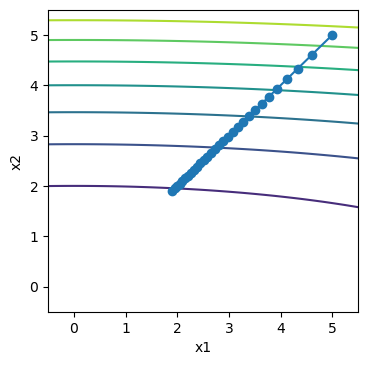

In [18]:
eta = 0.4


def Adagrad_gd(x1, x2, s1, s2):
    eps = 1e-16
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1**2
    s2 += g2**2
    x1 -= eta / np.sqrt(s1 + eps) * g1
    x2 -= eta / np.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2


# Number of iteration steps
iter = 30
# Record the iteration trace
x_arr = np.zeros((2, iter))
x_arr[:, 0] = np.array([5, 5])
f_arr = np.zeros((1, iter))
s1 = 0.
s2 = 0.
# Iteration
for ii in range(iter - 1):
    f_arr[0, ii] = 0.1 * x_arr[0, ii]**2 + 2 * x_arr[1, ii]**2
    x_arr[0,ii + 1], x_arr[1,ii + 1], s1, s2 =\
    Adagrad_gd(x_arr[0, ii],x_arr[1, ii], s1, s2)
f_arr[0, iter - 1] = 0.1 * x_arr[0, iter - 1]**2 + 2 * x_arr[1, iter - 1]**2
print("After %d epoches, x1 is %f, x2 is %f" %
      (iter, x_arr[0, iter - 1], x_arr[1, iter - 1]))
# Visualization
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
# Plot the contour
vis_arr_x = np.linspace(-0.5, 5.5, 100)
vis_arr_y = np.linspace(-0.5, 5.5, 100)
vis_X, vis_Y = np.meshgrid(vis_arr_x, vis_arr_y)
vis_Z = 0.1 * vis_X**2 + 2 * vis_Y**2
ax.contour(vis_X, vis_Y, vis_Z)
ax.plot(x_arr[0, :], x_arr[1, :],'o-')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

As we increase the learning rate to $2$, we see much better behavior. It indicates that the decrease in learning rate might be rather aggressive, even in the noise-free case and we need to ensure that parameters converge appropriately.

After 30 epoches, x1 is 0.000080, x2 is 0.000080


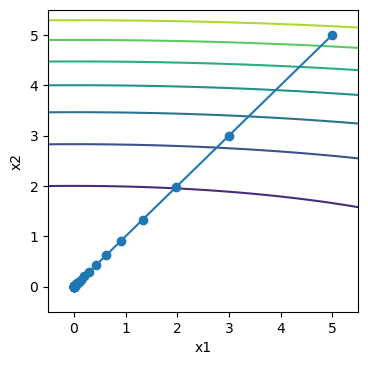

In [17]:
eta = 2


def Adagrad_gd(x1, x2, s1, s2):
    eps = 1e-16
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1**2
    s2 += g2**2
    x1 -= eta / np.sqrt(s1 + eps) * g1
    x2 -= eta / np.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2


# Number of iteration steps
iter = 30
# Record the iteration trace
x_arr = np.zeros((2, iter))
x_arr[:, 0] = np.array([5, 5])
f_arr = np.zeros((1, iter))
s1 = 0.
s2 = 0.
# Iteration
for ii in range(iter - 1):
    f_arr[0, ii] = 0.1 * x_arr[0, ii]**2 + 2 * x_arr[1, ii]**2
    x_arr[0,ii + 1], x_arr[1,ii + 1], s1, s2 =\
    Adagrad_gd(x_arr[0, ii],x_arr[1, ii], s1, s2)
f_arr[0, iter - 1] = 0.1 * x_arr[0, iter - 1]**2 + 2 * x_arr[1, iter - 1]**2
print("After %d epoches, x1 is %f, x2 is %f" %
      (iter, x_arr[0, iter - 1], x_arr[1, iter - 1]))
# Visualization
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
# Plot the contour
vis_arr_x = np.linspace(-0.5, 5.5, 100)
vis_arr_y = np.linspace(-0.5, 5.5, 100)
vis_X, vis_Y = np.meshgrid(vis_arr_x, vis_arr_y)
vis_Z = 0.1 * vis_X**2 + 2 * vis_Y**2
ax.contour(vis_X, vis_Y, vis_Z)
ax.plot(x_arr[0, :], x_arr[1, :],'o-')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

## RMSProp
### Motivation
The decrease in learning rate in Adagrad might be rather aggressive, even in the noise-free case. In the meantime, the coordinate wise adaptivity of Adagrad is highly desirable as a preconditioner.

### Algorithm
RMSProp is proposed to be a simple fix to decouple rate scheduling from coordinate-adaptive learning rates. This issue is that Adagrad accumulates the squares of the gradient $\mathbf{g}_t$ into a state vector $\mathbf{s}_t=\mathbf{s}_{t-1}+\mathbf{g}^2_t$. As a result $\mathbf{s}_t$ keeps on growing without bound due to the lack of normalization, essentially linearly as the algorithm converges.

RMSProp use a leaky average in the same way we used in momentum method $$\mathbf{s}_t=\gamma\mathbf{s}_{t-1}+(1-\gamma)\mathbf{g}^2_t$$ for some parameter $\gamma>0$ which determines how long the history is when adjusting the per-coordinate scale

The formalized updating rule for RMSProp when optimizing some loss function is 
$$\begin{aligned}\mathbf{g}_t&=\nabla_{\boldsymbol{\theta}}L(f(\mathbf{x}_t,\boldsymbol{\theta}_{t-1}),y_t)\\ \mathbf{s}_t&=\gamma\mathbf{s}_{t-1}+(1-\gamma)\mathbf{g}^2_t\\\boldsymbol{\theta}_t&=\boldsymbol{\theta}_{t-1}-\frac{\eta_0}{\sqrt{\mathbf{s}_t+\epsilon}}\odot\mathbf{g}_t\end{aligned}$$

### RMSProp Example
Still considering the ill-conditioned problem mentioned before and use an initial learning rate of $0.4$. Recall that when we used Adagrad with a learning rate of $0.4$, the variables moved only very slowly in the later stages of the algorithm since the learning rate decreased too quickly. Since $\eta$ is controlled differently this does not happen with RMSProp.  

After 30 epoches, x1 is 0.000015, x2 is 0.000015


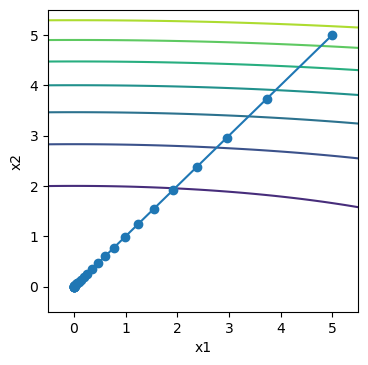

In [16]:
eta = 0.4
gamma = 0.9

def RMSProp_gd(x1, x2, s1, s2):
    eps = 1e-16
    g1, g2 = 0.2 * x1, 4 * x2
    s1 = gamma*s1+(1-gamma)*g1**2
    s2 = gamma*s2+(1-gamma)*g2**2
    x1 -= eta / np.sqrt(s1 + eps) * g1
    x2 -= eta / np.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2


# Number of iteration steps
iter = 30
# Record the iteration trace
x_arr = np.zeros((2, iter))
x_arr[:, 0] = np.array([5, 5])
f_arr = np.zeros((1, iter))
s1 = 0.
s2 = 0.
# Iteration
for ii in range(iter - 1):
    f_arr[0, ii] = 0.1 * x_arr[0, ii]**2 + 2 * x_arr[1, ii]**2
    x_arr[0,ii + 1], x_arr[1,ii + 1], s1, s2 =\
    RMSProp_gd(x_arr[0, ii],x_arr[1, ii], s1, s2)
f_arr[0, iter - 1] = 0.1 * x_arr[0, iter - 1]**2 + 2 * x_arr[1, iter - 1]**2
print("After %d epoches, x1 is %f, x2 is %f" %
      (iter, x_arr[0, iter - 1], x_arr[1, iter - 1]))
# Visualization
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
# Plot the contour
vis_arr_x = np.linspace(-0.5, 5.5, 100)
vis_arr_y = np.linspace(-0.5, 5.5, 100)
vis_X, vis_Y = np.meshgrid(vis_arr_x, vis_arr_y)
vis_Z = 0.1 * vis_X**2 + 2 * vis_Y**2
ax.contour(vis_X, vis_Y, vis_Z)
ax.plot(x_arr[0, :], x_arr[1, :],'o-')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

## Adadelta
**Adadelta** is another variant of AdaGrad. The main differences lies in the fact that it decreases the amount by which the learning rate is adaptive to coordinates. Moreover, traditionally it referred to as not having a learning rate since it uses the amount of change itself as calibration for future changes.

Adadelta uses two state variables $\mathbf{s}_t$ to store a leaky average of the second moment of the gradient and $\Delta\boldsymbol{\theta}_t$ to store a leaky average of the second moment of the change of parameters in the model itself.

The formalized updating rule when optimizing some loss function is
$$\begin{aligned}\mathbf{g}_t&=\nabla_{\boldsymbol{\theta}}L(f(\mathbf{x}_t,\boldsymbol{\theta}_{t-1}),y_t)\\ \mathbf{s}_t&=\gamma\mathbf{s}_{t-1}+(1-\gamma)\mathbf{g}^2_t\\\mathbf{g}'_t&=\frac{\sqrt{\Delta\mathbf{x}_{t-1}+\epsilon}}{\sqrt{\mathbf{s}_t+\epsilon}}\odot\mathbf{g}_t\\ \Delta\mathbf{x}_t&=\gamma\Delta\mathbf{x}_{t-1}+(1-\gamma){\mathbf{g}'_t}^2\\ \boldsymbol{\theta}_t&=\boldsymbol{\theta}_{t-1}-\mathbf{g}'_t\end{aligned}$$

## Adam
### Algorithm
**Adam** is one efficient learning algorithm which combines all the techniques mentioned above. It is an algorithm that has become rather popular as one of the more robust and effective optimization to use in deep learning. However, it is not without issues. There are situations where Adam can diverge due to poor variance control.

Adam uses leaky averaging to obtain an estimate of both the momentum and also the second moment of the gradient 
$$\begin{aligned}\mathbf{g}_t&=\nabla_{\boldsymbol{\theta}}L(f(\mathbf{x}_t,\boldsymbol{\theta}_{t-1}),y_t)\\ \mathbf{v}_t&=\beta_1\mathbf{v}_{t-1}+(1-\beta_1)\mathbf{g}_t\\ \mathbf{s}_t&=\beta_2\mathbf{s}_{t-1}+(1-\beta_2)\mathbf{g}^2_t\end{aligned}$$ 
Here $\beta_1$ and $\beta_2$ are nonnegative weighting parameters. Common choices for them are $\beta_1=0.9$ and $\beta_2=0.999$. That is, the variance estimate moves *much more slowly* than the momentum term. Note that if we initialize $\mathbf{v}_0=\mathbf{s}_0=0$ we have a **significant amount of bias** initially towards smaller values. This can be addressed by using the fact that 
$$\underset{i=1}{\overset{t}{\Sigma}}\beta^i=\frac{1-\beta^t}{1-\beta}$$ 
to re-normalize terms. The normalized state variables are given by 
$$\hat{\mathbf{v}}_t=\frac{\mathbf{v}_t}{1-\beta^t_1},\ \hat{\mathbf{s}}_t=\frac{\mathbf{s}_t}{1-\beta_2^t}$$
Then rescale the gradient in a manner very similar to that of RMSProp to obtain
$$\mathbf{g}'_t=\frac{1}{\sqrt{\hat{\mathbf{s}_t}}+\epsilon}\odot\hat{\mathbf{v}}_t$$
Pay attention to the slight cosmetic difference as the rescaling happen using $\frac{1}{\sqrt{\hat{\mathbf{s}_t}}+\epsilon}$ instead of $\frac{1}{\sqrt{\hat{\mathbf{s}_t}+\epsilon}}$. The former works arguably slightly better in practice. Typically we pick $\epsilon=10^{-6}$ or $\epsilon=10^{-8}$ for a good trade-off between numerical stability and fidelity. In the end, we update the parameters in a simple form
$$\boldsymbol{\theta}_t=\boldsymbol{\theta}_{t-1}-\eta\mathbf{g}'_t$$
The suggested default to the step size is $\eta=0.001$.

In a nutshell, the algorithm is 
$$\begin{aligned}\mathbf{g}_t&=\nabla_{\boldsymbol{\theta}}L(f(\mathbf{x}_t,\boldsymbol{\theta}_{t-1}),y_t)\\ \mathbf{v}_t&=\beta_1\mathbf{v}_{t-1}+(1-\beta_1)\mathbf{g}_t\\ \mathbf{s}_t&=\beta_2\mathbf{s}_{t-1}+(1-\beta_2)\mathbf{g}^2_t\\ \hat{\mathbf{v}}_t&=\frac{\mathbf{v}_t}{1-\beta^t_1}\\ \hat{\mathbf{s}}_t&=\frac{\mathbf{s}_t}{1-\beta_2^t}\\ \mathbf{g}'_t&=\frac{1}{\sqrt{\hat{\mathbf{s}_t}}+\epsilon}\odot\hat{\mathbf{v}}_t\\ \boldsymbol{\theta}_t&=\boldsymbol{\theta}_{t-1}-\eta\mathbf{g}'_t\end{aligned}$$
with the suggested default is
$$\beta_1=0.9,\ \beta_2=0.999,\ \epsilon=10^{-8},\ \eta=0.001$$

### Yogi
One of the problems of Adam it that it can fail to converge even in convex settings when the second moment estimate in $\mathbf{s}_t$ blows up. As a fix a refined update and initialization for $\mathbf{s}_t$ is proposed.

In Adam, the update rule for $\mathbf{s}_t$ is
$$\begin{aligned}\mathbf{s}_t&=\beta_2\mathbf{s}_{t-1}+(1-\beta_2)\mathbf{g}^2_t\\&=\mathbf{s}_{t-1}+(1-\beta_2)(\mathbf{g}_t^2-\mathbf{s}_{t-1})\end{aligned}$$
Whenever $\mathbf{g}^2_t$ has high variance or updates are sparse, $\mathbf{s}_t$ might forget past values too quickly. A possible fix for this is to replace $\mathbf{g}^2_t-\mathbf{s}_{t-1}$ by $\mathbf{g}^2_t\odot\text{sgn}(\mathbf{g}^2_t-\mathbf{s}_{t-1})$, which makes the magnitude of the update no longer depends on the amount of deviation. This is called the **Yogi updates**
$$\mathbf{s}_t=\mathbf{s}_{t-1}+(1-\beta_2)\mathbf{g}^2_t\odot\text{sgn}(\mathbf{g}^2_t-\mathbf{s}_{t-1})$$